<a href="https://colab.research.google.com/github/donghuna/AI-Expert/blob/main/%EC%B5%9C%EC%A0%95%EC%9A%B1/llm_2024_Lab01_HF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab1: Hugging Face

Updated by Geonho Lee, Sungwan Ryu 2024.8.25

Created by Minsoo Kim 2023.11.03

In [ ]:
import torch

In [ ]:
!pip install -U git+https://github.com/huggingface/transformers.git
!pip install -U git+https://github.com/huggingface/accelerate.git

  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-wslpgpnt
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-wslpgpnt
  Resolved https://github.com/huggingface/transformers.git to commit 0a7af19f4dc868bafc82f35eb7e8d13bac87a594
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.45.0.dev0-py3-none-any.whl size=9557589 sha256=8277e38d2aeb646076bca32b9369baad9284b5292cde13d0ecf42d73a1eb783a
  Stored in directory: /tmp/pip-ephem-wheel-cache-1zr_u9bn/wheels/e7/9c/5b/e1a9c8007c343041e61cc484433d512ea9274272e3fcbe7c16
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.42.4
    Uninstalling transformers-4.42.4:
      Successfully uninstalled transformers-4.42.4
  Cloning https://github.com

##Part 1. Quick Tour ✈️
Let's start with a complete example, taking a look at what happened behind the scenes

Trasnformer Pipeline : groups together three steps, **1) preprocessing**, **2) passing the inputs through the model**, and **3) postprocessing**

In [ ]:
from transformers import pipeline
classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
classifier(
    [
        "I've been waiting for a HuggingFace course my whole life.",
        "I hate this so much!",
        # # Write your own sentence!
        "Today is Friday",
        "Tommorrow is Monday",
        "Tommorrow is Monday. Where is my weekend?",
    ]
)

[{'label': 'POSITIVE', 'score': 0.9598048329353333},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455},
 {'label': 'POSITIVE', 'score': 0.995858371257782},
 {'label': 'POSITIVE', 'score': 0.7579646110534668},
 {'label': 'NEGATIVE', 'score': 0.9856467843055725}]

## Part 2: Common Pattern for Using Huggingface Transformers 👨‍🎓

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
#https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
# Initialize the tokenizerb
tokenizer = AutoTokenizer.from_pretrained(model_name)
# Initialize the model
model = AutoModelForSequenceClassification.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [ ]:
tokenizer

DistilBertTokenizerFast(name_or_path='distilbert-base-uncased-finetuned-sst-2-english', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [ ]:
tokenizer.vocab

{'ticking': 28561,
 'siam': 25583,
 'denny': 14465,
 '##making': 12614,
 '##rang': 24388,
 '##hiro': 18334,
 'ト': 1714,
 'gandhi': 12338,
 '[unused920]': 925,
 '##bri': 23736,
 'leach': 24520,
 'energies': 19320,
 'bulldog': 28628,
 'reacting': 24868,
 'psychological': 8317,
 'morley': 20653,
 'sheriff': 6458,
 '205': 16327,
 'request': 5227,
 'performed': 2864,
 'imagery': 13425,
 '625': 22810,
 '##cek': 25368,
 'garner': 18661,
 '##aba': 19736,
 'nutritional': 28268,
 'rumored': 22710,
 'howe': 13358,
 '1940s': 7675,
 'joshua': 9122,
 '##ious': 6313,
 'bing': 17620,
 '1868': 7582,
 'shouts': 15701,
 'dalai': 28511,
 'introduces': 13999,
 'rooted': 15685,
 'ul': 17359,
 '1889': 6478,
 'montevideo': 22460,
 'sulfate': 26754,
 'ashby': 28729,
 '##ح': 29820,
 'ks': 29535,
 '橋': 1885,
 'popularity': 6217,
 'china': 2859,
 '##ulated': 8898,
 'gratitude': 15531,
 '##rled': 27501,
 '##och': 11663,
 'coarse': 20392,
 'contradiction': 26917,
 'bam': 25307,
 '##⇄': 30117,
 'election': 2602,
 'w

In [ ]:
# Tokenize (text encoding)
sentence_to_tokenize = "Hugging Face Transformers is great!"
print(sentence_to_tokenize)
print(tokenizer.tokenize(sentence_to_tokenize))
tokenized = tokenizer(sentence_to_tokenize)
print(tokenized["input_ids"])

# Decode (text decoding, input_ids -> text)
decoded = tokenizer.decode(tokenized["input_ids"])
print(decoded)

# Matching with vocab.txt
print(f"16381th token is...{tokenizer.decode([16381])}")

Hugging Face Transformers is great!
['hugging', 'face', 'transformers', 'is', 'great', '!']
[101, 17662, 2227, 19081, 2003, 2307, 999, 102]
[CLS] hugging face transformers is great! [SEP]
16381th token is...parameter


In [ ]:
# Sentiment analysis process
inputs = "I'm excited to learn about Hugging Face Transformers!"

# step1. tokenize
tokenized_inputs = tokenizer(inputs, return_tensors="pt")

# step2. model inference
outputs = model(**tokenized_inputs)

labels = ['NEGATIVE', 'POSITIVE']
# step3. post-process (get result)
prediction = torch.argmax(outputs.logits)

print("Input:")
print(inputs)
print()
print("Tokenized Inputs:")
print(tokenized_inputs.input_ids)
print()
print("Model Outputs:")
print(outputs)
print("                                                   Negative, Positive")
print()
print(f"The prediction is {labels[prediction]}")

Input:
I'm excited to learn about Hugging Face Transformers!

Tokenized Inputs:
tensor([[  101,  1045,  1005,  1049,  7568,  2000,  4553,  2055, 17662,  2227,
         19081,   999,   102]])

Model Outputs:
SequenceClassifierOutput(loss=None, logits=tensor([[-3.4862,  3.6792]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)
                                                   Negative, Positive

The prediction is POSITIVE


## Part3. Text Generation with Decoder Model

In [ ]:
from transformers import AutoModelForCausalLM
#model_id = "facebook/opt-1.3b"
model_id = "facebook/opt-125m"
# Model Load
model_opt = AutoModelForCausalLM.from_pretrained(model_id, torch_dtype=torch.float16, device_map="auto")
# Tokenizer Load
tokenizer_opt = AutoTokenizer.from_pretrained(model_id)

config.json:   0%|          | 0.00/651 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/251M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/441 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
text = "Once upon a time, there is"
device = "cuda:0"
# Tokenize
inputs = tokenizer_opt(text, return_tensors="pt").to(device)

# Model Generation (Greedy Search)
outputs = model_opt.generate(**inputs, max_new_tokens=15)

# Decode generated output
print(f"generated output: {outputs[0]}\n")
print(f"Decoding result (Greedy): {tokenizer_opt.decode(outputs[0], skip_special_tokens=True)}\n")


# Model Generation (Beam Search)
outputs = model_opt.generate(**inputs, max_new_tokens=15, num_beams = 3, do_sample=False)

# Decode generated output
# print(f"generated output: {outputs[0]}\n")
print(f"Decoding result (Beam Search): {tokenizer_opt.decode(outputs[0], skip_special_tokens=True)}")



generated output: tensor([    2, 11475,  2115,    10,    86,     6,    89,    16,    10,   313,
           54,    16,    10,   313,     9,     5,    82,     4, 50118, 50118,
          894,    16,    10], device='cuda:0')

Decoding result (Greedy): Once upon a time, there is a man who is a man of the people.

He is a
Decoding result (Beam Search): Once upon a time, there is no such thing as a free lunch.       


## Transformer Analysis with HuggingFace (1) Encoder 🔎


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "distilbert-base-uncased-finetuned-sst-2-english"
# Initialize the tokenizerb
tokenizer = AutoTokenizer.from_pretrained(model_name)
# Initialize the model
model = AutoModelForSequenceClassification.from_pretrained(model_name)

In [ ]:
input_str = "May the force be with you"

model_inputs = tokenizer(input_str, return_tensors="pt")
with torch.no_grad():
    model_output = model(**model_inputs, output_attentions=True, output_hidden_states=True)


print("Hidden state size (per layer):  ", model_output.hidden_states[0].shape) # batch, sequence_length, hidden_dimension
print("Attention head size (per layer):", model_output.attentions[0].shape)    # batch, head_number, sequence_length, sequence_lengthb

Hidden state size (per layer):   torch.Size([1, 8, 768])
Attention head size (per layer): torch.Size([1, 12, 8, 8])


['[CLS]', 'may', 'the', 'force', 'be', 'with', 'you', '[SEP]']


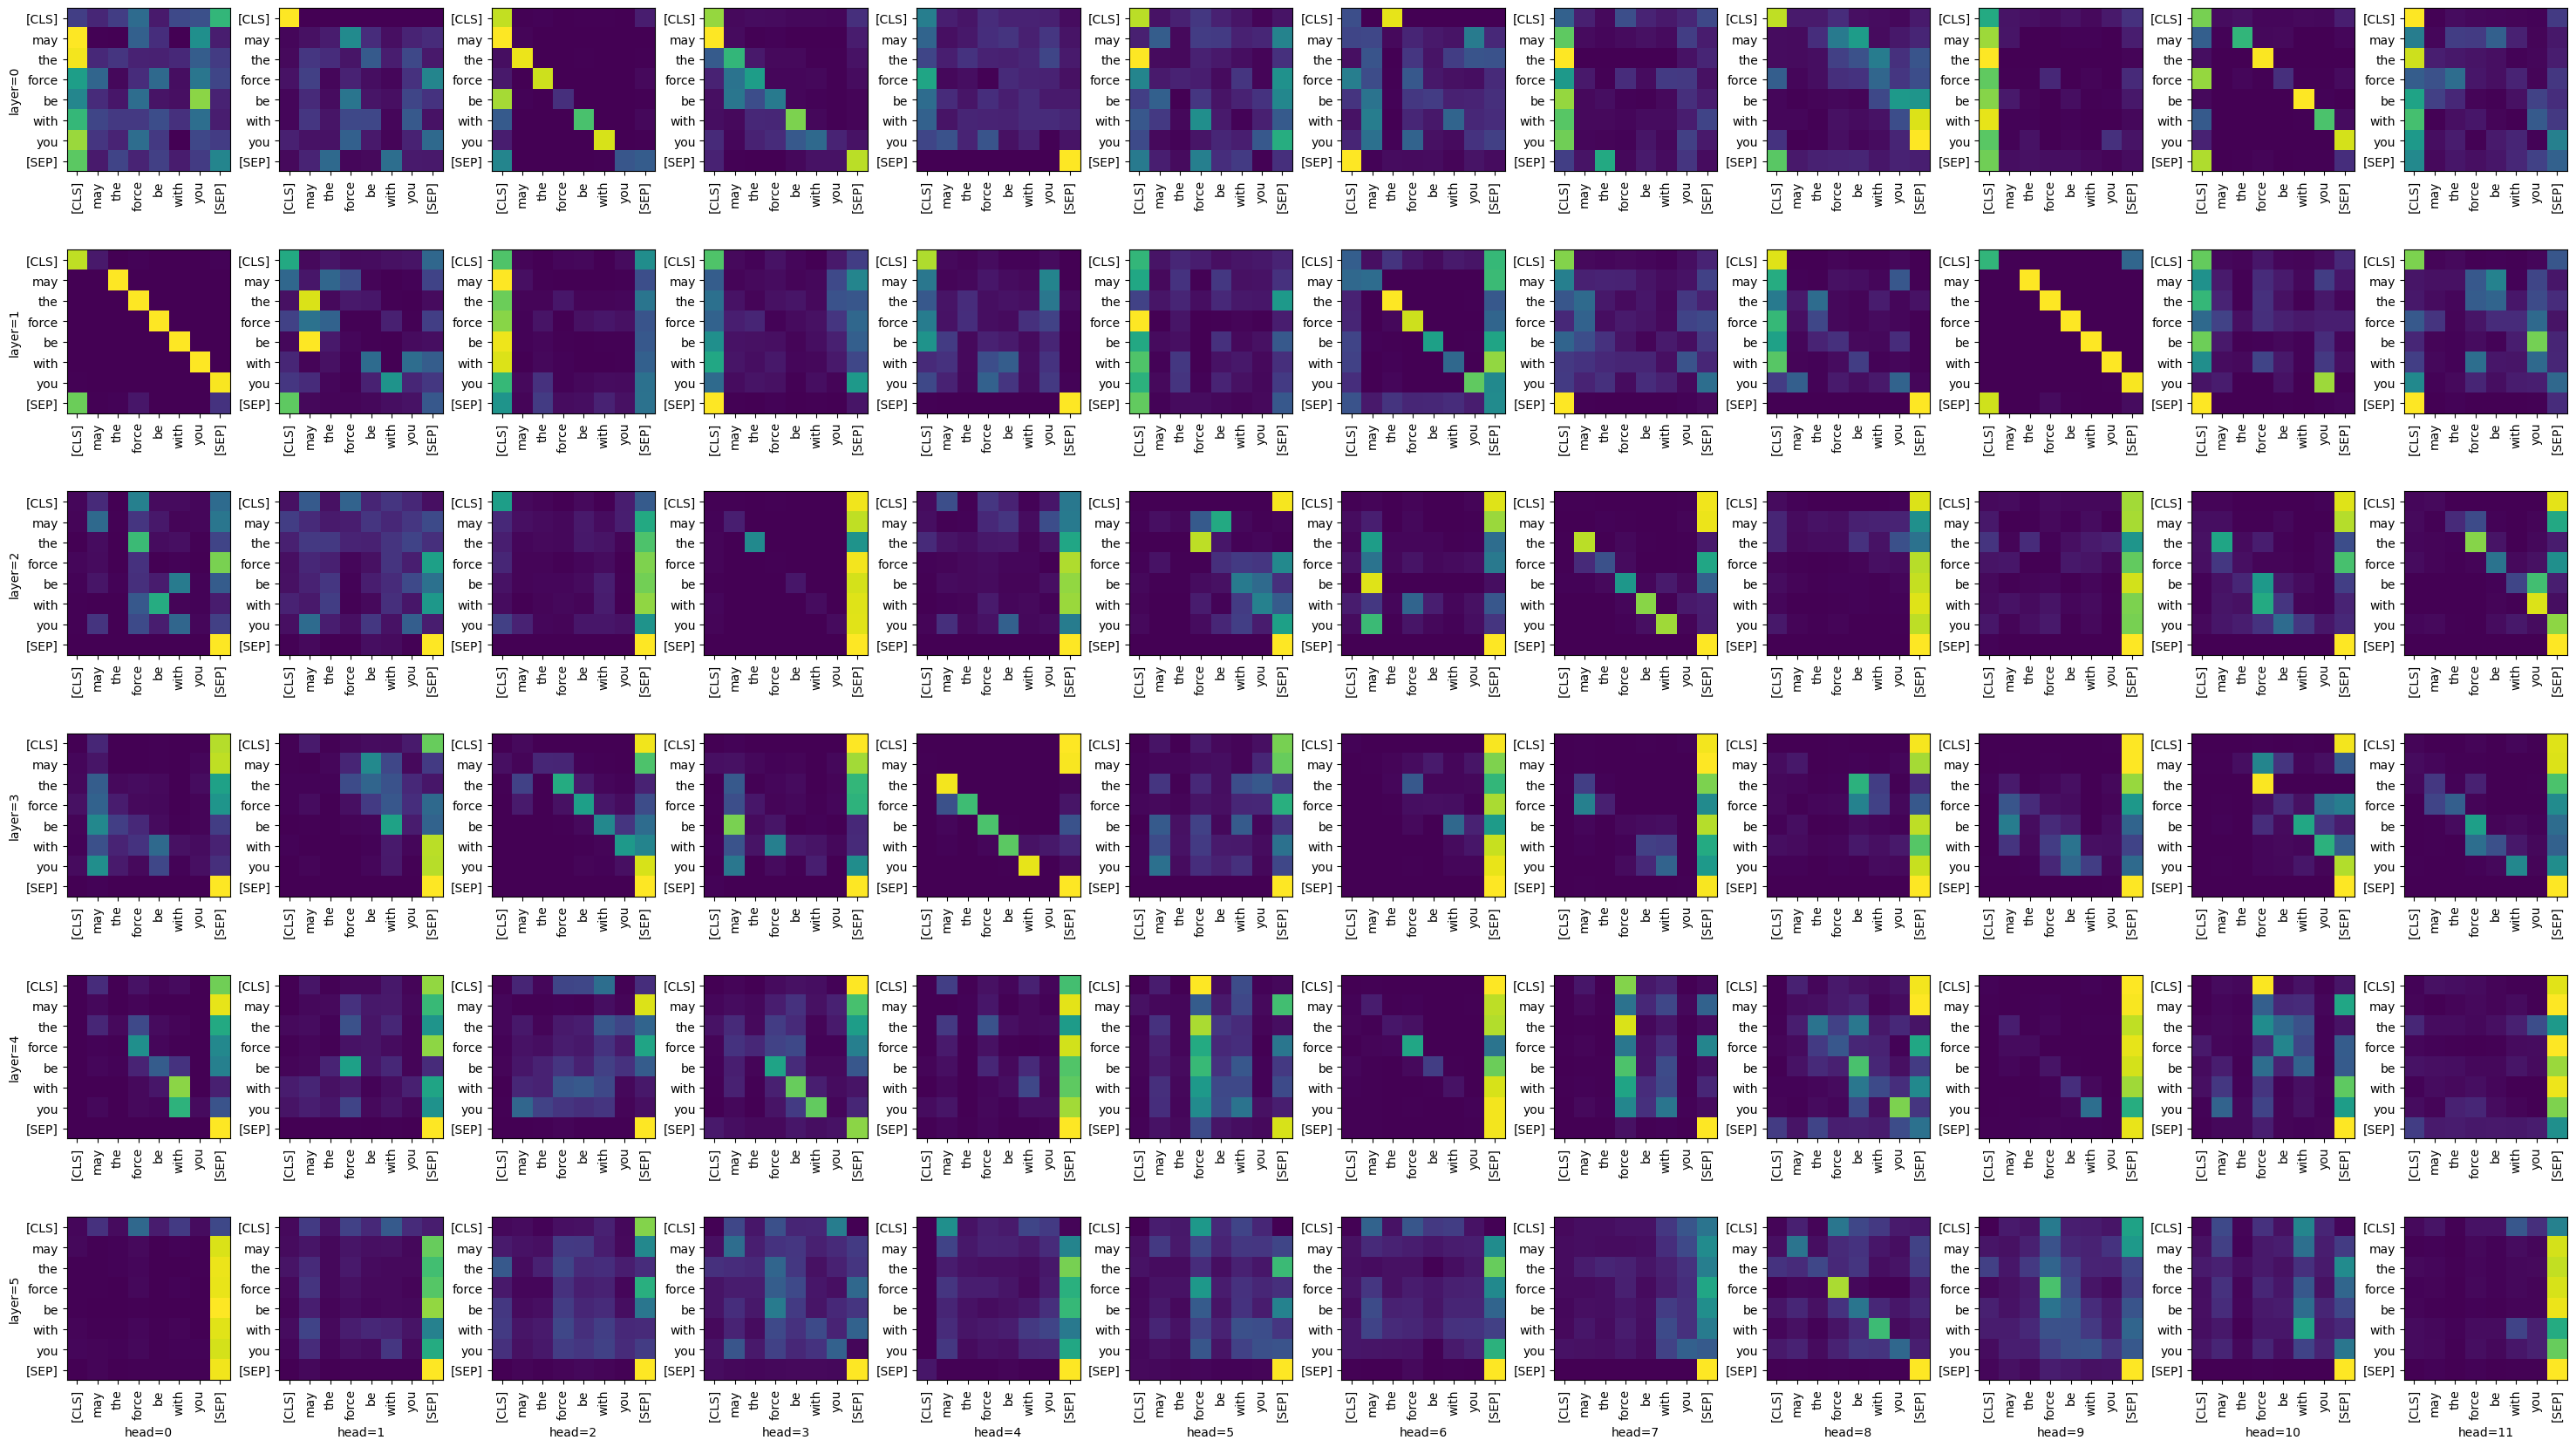

In [ ]:
from matplotlib import pyplot as plt

tokens = tokenizer.convert_ids_to_tokens(model_inputs.input_ids[0])
seq_len = model_inputs.input_ids.shape[1]
print(tokens)


n_layers = len(model_output.attentions)
n_heads = len(model_output.attentions[0][0])
fig, axes = plt.subplots(6, 12)
fig.set_size_inches(18.5*2, 10.5*2)
for layer in range(n_layers):
    for i in range(n_heads):
        axes[layer, i].imshow(model_output.attentions[layer][0, i])
        axes[layer][i].set_xticks(list(range(seq_len)))
        axes[layer][i].set_xticklabels(labels=tokens, rotation="vertical")
        axes[layer][i].set_yticks(list(range(seq_len)))
        axes[layer][i].set_yticklabels(labels=tokens)

        if layer == 5:
            axes[layer, i].set(xlabel=f"head={i}")
        if i == 0:
            axes[layer, i].set(ylabel=f"layer={layer}")

plt.subplots_adjust(wspace=0.3)
plt.show()

## Transformer Analysis with HuggingFace (2) Decoder 🔎

In [ ]:
from transformers import AutoModelForCausalLM
model_id = "facebook/opt-125m"
# Model Load
model = AutoModelForCausalLM.from_pretrained(model_id)
# Tokenizer Load
tokenizer = AutoTokenizer.from_pretrained(model_id)

In [ ]:
input_str = "May the force be with"

# Tokenize input sentence
model_inputs = tokenizer(input_str, return_tensors="pt")

# Decoder model inference
with torch.no_grad():
  model_output = model(**model_inputs, )


In [ ]:
import numpy as np
import seaborn as sns

output_logit = model_output.logits # batch size, sequence length, vocab size

# get last token prediction's logit
last_token_logits = output_logit[0, -1, :]

# get probability distribution with softmax function
probs = torch.nn.Softmax(dim=-1)(last_token_logits)


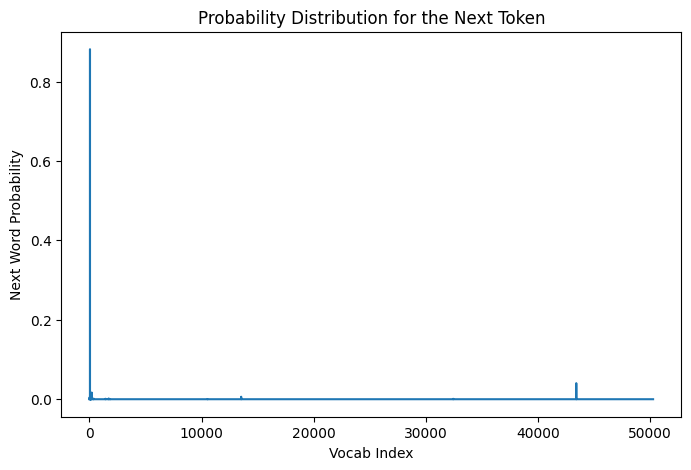

In [ ]:
# visualize probability distribution

plt.figure(figsize=(8,5), dpi=100)
sns.lineplot(probs)
plt.xlabel('Vocab Index')
plt.ylabel('Next Word Probability')
plt.title('Probability Distribution for the Next Token')
plt.show()



In [ ]:
probs.sort(descending=True)[0][:5]

tensor([0.8813, 0.0404, 0.0168, 0.0139, 0.0063])

In [ ]:
# Get Top-5 high probability token prediction
top_5_index = probs.sort(descending=True)[1][:5]
top_5_probs = probs.sort(descending=True)[0][:5]

output_list = ""
for i in range(len(top_5_index)):
    token = top_5_index[i]
    output_list += f"{str(tokenizer.decode(token))}:{token.item()}:{top_5_probs[i]: .2f}   "
#top_5_pair = list(map(lambda x: tokenizer.decode(x)+":"+str(x.item()), top_5_index))


# decode Top-5 token ID to text
#print(f"Predicted top-5 tokens are...{tokenizer.decode(top_5_index)}")
print("Predicted top-5 tokens are...")
print(output_list)

Predicted top-5 tokens are...
 you:47: 0.88    thee:43419: 0.04    us:201: 0.02    her:69: 0.01    ya:13531: 0.01   
